<a href="https://colab.research.google.com/github/ErSangram/hotel_booking/blob/main/EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Hotel Booking Analysis

##### **Project Type**    - EDA
##### **Contribution** - Individual
##### **Team Member 1** - Sangram Naik

  # **Project Summary** -
  This project involves the analysis of the provided data set pertaining to Hotel bookings for City and Resort Hotels.  
Hotel industry is a complicated field for data analysis. Hotel performance depends on a lot of variables: location, room types distribution, meals, tour operators, time of the year flights capacity, etc.   

   Booking data is the one of the most granular data in the hotel industry from the perspective of the revenue: one can disclose time paterns or try to predict outcomes like wheter a booking will end up in a cancellation.    
    
   In this project I'll try to use an open dataset with information of two real hotels to answer questions of interest regarding the industry, and those hotels in particular.  
It's real booking data from two hotels: one resort hotel and one city hotel, with arrivals from july 2015 to august 2017, including a total of 21 variables. 




#**GitHub Link** -

# **Problem Statement**

Case study based on the Hotel bookings related data is vital for any hospitality business as it gives insight into booking behaviour of customers as well as channels through which bookings are made.    




**Business Objective.**   
Explore and analyze the data to discover important factors that govern the bookings.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Alma_projects/Hotel Bookings.csv')

### Dataset First View

In [3]:
# Dataset First Look see top 5 rows
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f'A Data contain {data.shape[0]} rows and {data.shape[1]} Columns')

A Data contain 119390 rows and 32 Columns


### Dataset Information

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

31994

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
n_df = data.isna().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'Columns',0:'Null_values'})
n_df.head(7)

,Columns,Null_values
0,company,112593
1,agent,16340
2,country,488
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0
6,booking_changes,0


In [8]:
# Visualizing the missing values
# plt.figure(figsize=(14,4))
# sns.factorplot(x='Columns',y='Null_values',data=data, c='r')
# plt.xlable('')

### What did you know about your dataset?

The dataset has 119390 rows and 32 columns. The columns contains various data types this are object, int and float.       
The dataset also have 31994 duplicate values.      
There are null values in 4 columns that is children,country,agent,company.


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
# # Dataset Describe
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description 


*   **Hotel:** H1= Resort Hotel, H2= City Hotel    
* **is_canceled** : If the booking was canceled(1) or not(0)      
*lead_time : Number of days that elapsed between the entering date of the booking into the PMS(Property Management System) and the arrival date   
*arrival_date_year : Year of arrival date.  
arrival_date_month : Month of arrival date.  
arrival_date_week_number : Week number for arrival date.  
arrival_date_day_of_month: Which day of the months guest is arriving.  
stays_in_weekend_nights: Number of weekend nights (Saturday or    Sunday) the guest stayed or booked to stay at the hotel.  
stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.  
adults : Number of adults.  
children : Number of children.  
babies : Number of babies.   
meal: kind of meal opted for.  
country : Country code.  
market_segment: Through which channel hotels were booked.  
distribution_channel : How the customer accessed the stay-   Corporate Booking/Direct/TA.TO
is_repeated_guest : The values indicating if the booking name was from a repeated guest (1) or not (0).  
previous_cancellations : Was there a cancellation before.  
previous_bookings_not_canceled : Count of previous bookings not cancelled.   
reserved_room_type : Code of room type reserved.  
assigned_room_type : Code for the type of room assigned to the booking.   
booking_changes : Count of changes made to booking.  
deposit_type : Deposit type.  
agent : If the booking happens through agents or not.  
company : If the booking happens through companies, the company ID that made the booking or responsible for paying the booking.  
days_in_waiting_list : Number of days the booking was on the   waiting list before the confirmation to the customer.
customer_type : Booking type like Transient – Transient-Party –   Contract – Group.  
adr : Average Daily Rates that described via way of means of   dividing the sum of all accommodations transactions using entire numbers of staying nights.  
required_car_parking_spaces : How many parking areas are necessary for the customers.  
total_of_special_requests : Total unique requests from consumers.  
reservation_status: The last status of reservation, assuming one of three categories: Canceled – booking was cancelled by the customer; Check-Out;No-Show.  
reservation_status_date: The last status date.  

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='adults'>

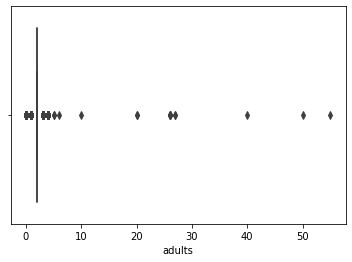

In [43]:
# In Adult, children and babies column have maximum value far from general possibilities. cheking this outliers.
sns.boxplot(data['adults'])

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
a,b = [],[]
for i in list(data.columns):
    a.append(i)
    b.append(data[i].nunique()) 
    
lis = list(zip(a,b))
df = pd.DataFrame(lis, columns = ['column_names','unique values'])
df

,column_names,unique values
0,hotel,2
1,is_canceled,2
2,lead_time,479
3,arrival_date_year,3
4,arrival_date_month,12
5,arrival_date_week_number,53
6,arrival_date_day_of_month,31
7,stays_in_weekend_nights,17
8,stays_in_week_nights,35
9,adults,14


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Need to make data clean frist delete duplicate values from the dataset
data.drop_duplicates(inplace=True)

In [13]:
#Delete company	column due to this column contains huge amount of null data.
data.drop(['company'],axis=1, inplace=True)

In [14]:
#Other columns agent, country and children	have less number of null values then they can fill using varies methoeds.
data['agent'].fillna(method='ffill', inplace=True)
data['country'].fillna(method='ffill', inplace=True)
data['children'].fillna(0,inplace=True)

In [15]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             3
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [16]:
# add some new columns
data['total_people'] = data['adults'] + data['babies'] + data['children']   
data['total_stay_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']   

In [19]:
# in dataset see the datatypes of children, agent and total_people columns are incorect,change their datatypes.
data['children']= data['children'].astype(int)
# data['agent']= data['agent'].astype(int)
data['total_people'] = data['total_people'].astype(int)

### What all manipulations have you done and insights found?

Firstly, we deleted all duplicated rows in Dataset.  
Secondly, handled all null/missing values.  
Then we changed the data types of columns to suitable data types.  
Fixed more erroneous data.  
Added new columns for better analysis.  
Created to separate data frames for both our hotel types for   easier comparison.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### 1) Which type of hotel is mostly prefered by the guests?

Text(0.5, 1.0, 'Hotel Booking in %')

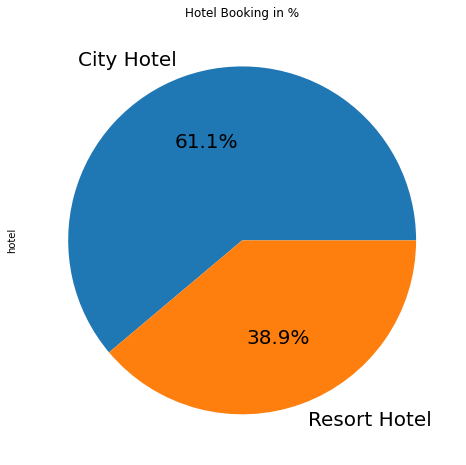

In [20]:
# Visualizsing the by pie chart.
data['hotel'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,8),fontsize=20)
plt.title('Hotel Booking in %')

##### 1. Why did you pick the specific chart?

Answer Here.

####2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here